In [1]:
#Here we will be covering:

what_we_were_covering=(
"0. An end-to-end Scikit-learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make prediction on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save adn load a trained model",
"7. Put it all together!")

In [2]:
import pandas as pd
import numpy as np

# 1. Get the data ready

In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 1.1 Split the data into x and y labels


In [4]:

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

In [5]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 1.2 Split the data into train and test set

In [7]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [9]:
x.shape

(303, 13)

In [10]:
len (heart_disease)*0.2

60.6

In [11]:
303 - 60.6

242.4

## 1.3 Make sure the data is numerical

In [12]:
url = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv"
car_sales = pd.read_csv(url)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [13]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [14]:
len(car_sales)

1000

In [15]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [16]:
# splitting into x and y

x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

In [17]:
# splitting the data into train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Building a machine learning model

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#model.fit(x_train,y_train)
#model.score(x_test,y_test) It's an error since it dtype is not numerical

In [19]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


- To turn the non-numerical data to numerica use: `One Hot Encoding`

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot , categorical_features)],remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [21]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [22]:
# converting transformed_x to df

pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [23]:
# doing it in another way with pd.get_dummies 

dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [24]:
# let's refit the model

x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

model.fit(x_train,y_train)

RandomForestRegressor()

In [25]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [26]:
model.score(x_test,y_test)

0.2194573675395599

# 1.4 what if there were missing values?

1. Fill them with some values.
2. Remove the samples with the missing data altogether.

In [27]:
# import car sales missing data

url = "https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv"
car_sales_missing = pd.read_csv(url)
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [28]:
# checking missing no.of.missing values

car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
# create x and y

x = car_sales_missing.drop("Price",axis=1)
y = car_sales["Price"]

In [30]:
# conerting it to numerical

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder = "passthrough")

tranformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
len(car_sales_missing)

1000

In [32]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
car_sales_missing.dropna(inplace=True)

In [34]:
len (car_sales_missing)

773

In [35]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [36]:
len (car_sales_missing)

773

In [37]:
model.fit(x_train,y_train)


RandomForestRegressor()

In [38]:
model.score(x_test,y_test)

0.2159635304678037

### option 2: Filling Missing data and transforming categorical data with scikit-learn

The main takeways:
- split the data
- Fill/transform the training set and test set separately

In [39]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# drop the rows with no labels

car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [42]:
# split into x and y 

x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

# split data into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [43]:
# checking the missing values

x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [44]:
# filling the missing values with sklearn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill the categorical values with missing and numerical values with mean
# impute = filling

cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#define columns

cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])


#fill train and test value separately

filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.transform(x_test)


# check the filled x_train

filled_x_train

array([['Honda', 'Blue', 4.0, 136392.0],
       ['Nissan', 'White', 4.0, 72122.0],
       ['Toyota', 'White', 4.0, 122453.0],
       ...,
       ['Honda', 'missing', 4.0, 213793.0],
       ['BMW', 'Black', 5.0, 158339.0],
       ['Toyota', 'White', 4.0, 71805.0]], dtype=object)

In [45]:
# Get our transformed data array's back into dataframe

car_sales_filled_train = pd.DataFrame(filled_x_train,
                                      columns=["Make","Colour","Doors","Odometer (KM)"]) 

car_sales_filled_test = pd.DataFrame(filled_x_test,
                                     columns = ["Make","Colour","Doors","Odometer (KM)"])

# check missing data in training set

car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [46]:
# checking the missing values again
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
# converting to non-numerical to numerical

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder = "passthrough")

# fill train and test values separately

transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test  = transformer.transform(car_sales_filled_test)

# check transformed and filled x_train

transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.36392e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.21220e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.22453e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.13793e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.58339e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.18050e+04]])

In [48]:
#now we have tranformed x 
# let's see if we can fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one hot encoded x data)

model.fit(transformed_x_train,y_train)
model.score(transformed_x_test,y_test)

0.07379478656517491

In [49]:
# check the length of transformed data (filled with one hot encoder) vs length of original data

len (transformed_x_train.toarray()) + len (transformed_x_test.toarray()),len(car_sales)

(950, 1000)

Note: The 50 less values in the transformed data is missing because we dropped the rows(50 total) with missing values in the price column.

# 2. Choosing the right estimator/algorithm for your problem

Notes:
- sklearn refers to machine learning model and estimators refers to algorithms.
- Refer scikit-learn map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [50]:
# get the caloifornia housing data set

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [51]:
# converting the data into dataframe

housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [52]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [53]:
# import algorithm 

from sklearn.linear_model import Ridge

# setup random seed

np.random.seed(42)

# create data

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# split the data into train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model (on the training set)

model =Ridge()
model.fit(x_train,y_train)

#check the score of the model
model.score(x_test,y_test)

0.5758549611440126

### Trying with ensemble algorithms

In [54]:
# import algorithm 

from sklearn.ensemble import GradientBoostingRegressor

# setup random seed

np.random.seed(42)

# create data

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# split the data into train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model (on the training set)

model =GradientBoostingRegressor()
model.fit(x_train,y_train)

#check the score of the model
model.score(x_test,y_test)

0.7755824521517651

In [55]:
# import algorithm 

from sklearn.ensemble import RandomForestRegressor

# setup random seed

np.random.seed(42)

# create data

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# split the data into train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate and fit the model (on the training set)

model = RandomForestRegressor()
model.fit(x_train,y_train)

#check the score of the model
model.score(x_test,y_test)

0.8066196804802649

## 2.1 Picking up machine learning model for classification problem

refer sklearn map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [56]:
# get the data 

heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [57]:
len(heart_disease)

303

using linear_svc based on the sklearn map

In [58]:
from sklearn.svm import LinearSVC

# set random seed

np.random.seed(42)

# Make the data

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data into train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate the model 

model = LinearSVC(max_iter=10000)
model.fit(x_train,y_train)

# evaluate the model

model.score(x_test,y_test)

/home/akash/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/akash/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [59]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [60]:
# import Randomforestclassifier algorithm

from sklearn.ensemble import RandomForestClassifier

# set random seed

np.random.seed(42)

# split the data into x and y

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data into train and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate the modle(clf) and fit the model

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# evaluate the model
clf.score(x_test,y_test)

0.8524590163934426

### Tidbit:
1. If the data is structured data, use ensemble methods.
2. If the data is unstructured data, use deep learning or transfer learning.

# 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 fitting the model into data

Different names for:
1. `x` = features,features variables,data.
2. `y` = labels,targets,targets variables.


In [61]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
from  sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

clf.score(x_test,y_test)

0.8524590163934426

In [63]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [64]:
x.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using.

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

# 3.2 Making prediction using machine learning models

2 ways of make predictions
1. `predict()`
2. `predict_proba()`

In [65]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [66]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [67]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [68]:
# compare the predictions to truth models to evaluate model

y_preds = clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Making prediction with `predict_proba()` - use this if someone asks you "what is the probability of your model of assigning to each prediction?"  

In [70]:
# Predict_proba() returns probabilities of a classification label

clf.predict_proba(x_test[:10])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [71]:
x_test[:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2


In [72]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [73]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [74]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed()

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)

# predictions
y_preds = model.predict(x_test)

In [75]:
y_preds[:10]

array([0.37, 0.73, 0.49, 0.18, 0.74, 0.06, 0.87, 0.86, 0.59, 0.31])

In [76]:
# compare predictions to the truth labels

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.24655737704918035

In [77]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

 Read:https://scikit-learn.org/stable/modules/model_evaluation.html

# 4. Evaluating a Machine learning model

- Three ways to evaluate a scikit-learn model/estimators.

1. Estimator's built in `score()` method.
2. The `scoring` method.
3. Problem specific functions.

Read this to know more:https://scikit-learn.org/stable/modules/model_evaluation.html

In [78]:
# classification problem

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(x_train,y_train)

RandomForestClassifier()

In [79]:
# score of the model (test_set)

clf.score(x_test,y_test)

0.8524590163934426

In [80]:
# score of the train model
clf.score(x_train,y_train)

1.0

In [81]:
# regression problem

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("target",axis=1)
y= housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

RandomForestRegressor()

In [82]:
model.score(x_test,y_test)

0.8066196804802649

In [83]:
model.score(x_train,y_train)

0.9736828565983116

In [84]:
# classification problem

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
clf.score(x_test,y_test)

0.8524590163934426

### 4.2 Evaluating a model using `scoring` parameter



In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score # cross vailidation
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf= RandomForestClassifier()

clf.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
clf.score(x_test,y_test)

0.8524590163934426

In [88]:
cross_val_score(clf,x,y) #cv=none by default

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [89]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [90]:
cross_val_score(clf,x,y,cv=5)

array([0.85245902, 0.8852459 , 0.81967213, 0.8       , 0.78333333])

In [91]:
np.random.seed(42)

# single train and tes_set's score
clf_single = clf.score(x_test,y_test)

# Mean of 5 fold cross validated score
clf_cv_5 = np.mean(cross_val_score(clf,x,y,cv=5))

# Mean of 10 fold cross validated score
clf_cv_10 = np.mean(cross_val_score(clf,x,y,cv=10))

clf_single,clf_cv_5,clf_cv_10

(0.8524590163934426, 0.8248087431693989, 0.831505376344086)

In [92]:
clf.score(x_test,y_test) # by default scoring parameter = mean accuracy

0.8524590163934426

In [93]:
# scoring parameter set to none by default

cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.81967213, 0.8852459 , 0.83606557, 0.81666667, 0.76666667])

In [94]:
what_we_were_covering

('0. An end-to-end Scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save adn load a trained model',
 '7. Put it all together!')

### 4.2.1 Classification model evaluation metrices

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [95]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,x,y,cv=5)


In [97]:
np.mean(cross_val_score)

0.8215300546448088

In [98]:
print(f"The heart disease classiffier cross-validated-accuracy: {np.mean(cross_val_score)*100:.2f}%")

The heart disease classiffier cross-validated-accuracy: 82.15%


**Area under receiver operating characteristic curve(AUC/ROC)**
- Area under curve(AUC)
- ROC curve


The ROC Curves are a comparison of model's true positive rate(tpr) and false positive rate(fpr)

- True positive - model predicts 1 when truth is 1
- False positive - model predicts 1 when truth is 0
- True negative - model predicts 0 when truth is 0
- False negative - model predicts 0 when truth is 1

In [99]:
from sklearn.metrics import roc_curve

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# fit the clf

clf.fit(x_train,y_train)

# make predictions with probabilities

y_probs = clf.predict_proba(x_test)
y_probs[:10],len(y_probs)

(array([[0.89, 0.11],
        [0.05, 0.95],
        [0.1 , 0.9 ],
        [0.79, 0.21],
        [0.09, 0.91],
        [0.02, 0.98],
        [0.76, 0.24],
        [0.19, 0.81],
        [0.62, 0.38],
        [0.99, 0.01]]),
 61)

In [100]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01])

In [101]:
# calculate the fpr,tpr and threshold 

fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

/home/akash/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


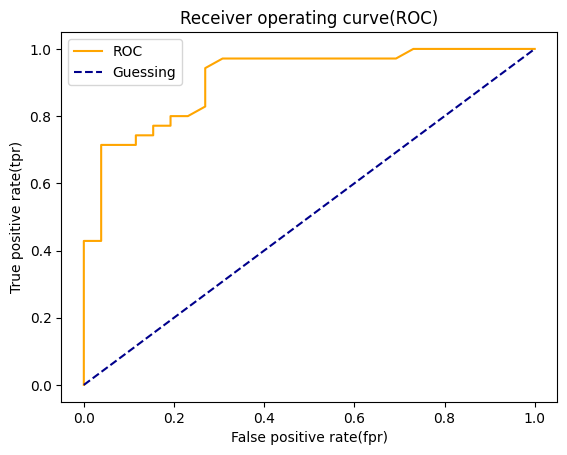

In [102]:
# create a plot for plotting roc curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):

    """
    Plots the ROC curve given the false positive rate (fpr) and 
    true positive rate (tpr) of a model
    """

    # plot a roc curve
    fig,ax = plt.subplots();

    ax.plot(fpr,tpr,color="Orange",label="ROC")

    # plot the line with no predictive power (baseline)

    ax.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")


    #cutomize the plot
    ax.set(title="Receiver operating curve(ROC)",
            xlabel="False positive rate(fpr)",
            ylabel="True positive rate(tpr)")
    ax.legend()


plot_roc_curve(fpr,tpr)

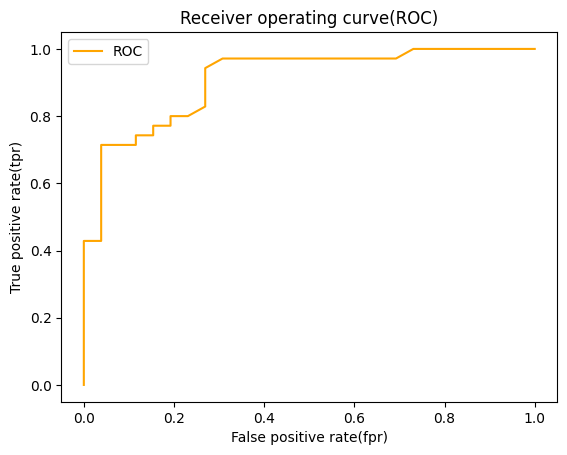

In [103]:
# create a plot for plotting roc curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):

    """
    Plots the ROC curve given the false positive rate (fpr) and 
    true positive rate (tpr) of a model
    """

    # plot a roc curve
    fig,ax = plt.subplots();

    ax.plot(fpr,tpr,color="Orange",label="ROC")

    # plot the line with no predictive power (baseline)

   #ax.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")


    #cutomize the plot
    ax.set(title="Receiver operating curve(ROC)",
            xlabel="False positive rate(fpr)",
            ylabel="True positive rate(tpr)")
    ax.legend()


plot_roc_curve(fpr,tpr)

In [104]:
import sklearn
print(sklearn.__version__)


1.4.0


In [105]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9093406593406593

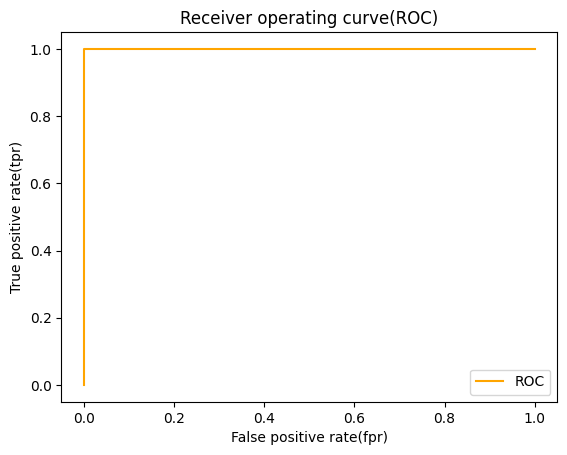

In [106]:
# plot the perfect roc curve and auc curve

fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [107]:
# perfect auc score
roc_auc_score(y_test,y_test)

1.0

- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
- https://www.youtube.com/watch?v=4jRBRDbJemM

### Confusion matrix

The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

- A confusion matrix is a quick way to compare the label's model predict and actual labels it was supposed to predict.
- In essence,giving you an idea of where the model is getting confused.

In [108]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[21,  5],
       [ 8, 27]])

In [109]:
# to visulaize use pd.crosstab()

pd.crosstab(
    y_test,
    y_preds,
    rownames=["Actual label"],
    colnames=["Predicted label"]
)

Predicted label,0,1
Actual label,,
0,21,5
1,8,27


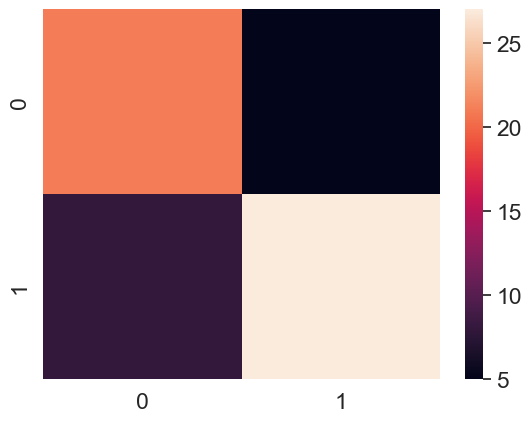

In [110]:
import seaborn as sns

# set font scale
sns.set(font_scale=1.5)

# create the confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# plot it
sns.heatmap(conf_mat);

### Creating a confusion matrix using scikit-learn

scikit-learn has multiple differnet implementations of plotting confusion matrices: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

In [111]:
# To remove the white lines in the grid
sns.reset_orig()

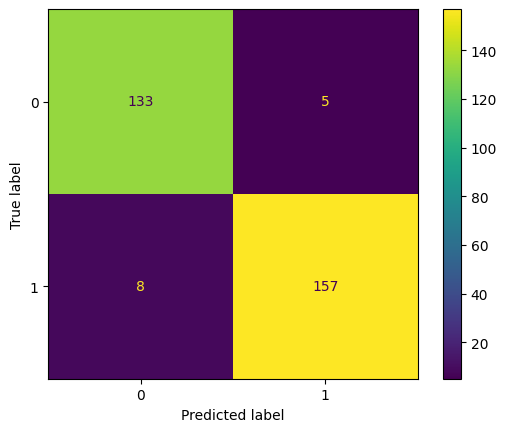

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y);

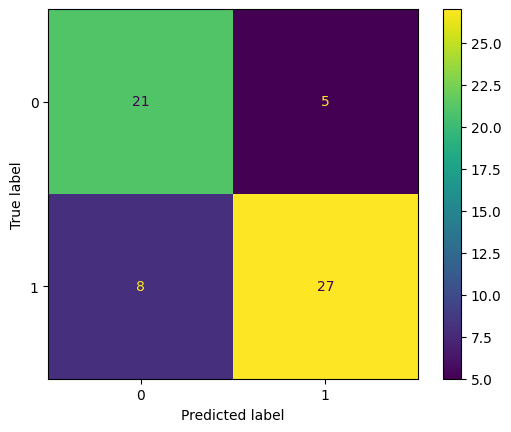

In [113]:
# confusion matrix from predictions

ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds);

**Classification report**

In [114]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



### Summary 

- **Accuracy** is a good measure to start if all classes are balanced.
- **Precision** and **Recall** becomes more important when classes are imbalanced.
- If false positive predictions are worse than false negatives,aim for higher precision.
- If false negative are worse than false positives, aim for higher cell.
- **F1 score** is a combination of precision and recall.

## 4.2.2 Regression model evaluation metrics


Model evaluation metrics documentations - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

we will cover:

1. R^2 or coefficient of determination.
2. Mean Absolute error(MAE).
3. Mean square error(MSE).

**What does R^2 does?**

- R^2 is an measure that represents the goodness of the regression model.
- The values of R-square lies between lies between 0 to 1.
- when R^2 =1, model prefectly fits the data and no difference between predicted value and actual value.
- When R^2 = 0, model does not predict any variability in the model.


In [115]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x =housing_df.drop("target",axis=1)
y = housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

RandomForestRegressor()

In [116]:
model.score(x_test,y_test)

0.8066196804802649

In [117]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [118]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [119]:
y_test.mean()

2.0550030959302323

In [120]:
from sklearn.metrics  import r2_score

# fill the array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [121]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [122]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)


0.0

In [123]:
r2_score(y_true=y_test,
         y_pred =y_test)

1.0

### Mean Absolute Error
- MAE is the average of absolute differences between predictions and actual values.
- It basically give an idea how wrong your model predictions are.

In [124]:
#MAE

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.3265721842781009

In [125]:
df = pd.DataFrame(data={"Actual Values": y_test,
                        "Predicted Values": y_preds})
df["Differences"] = df["Predicted Values"]-df["Actual Values"]
df.head()

,Actual Values,Predicted Values,Differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240


In [126]:
# MAE using formula and differences
np.abs(df["Differences"]).mean()

0.3265721842781009

### Mean square error

- Measures the square difference between predicted and actual values

In [127]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534073069137548

In [128]:
df.head()

,Actual Values,Predicted Values,Differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240


In [129]:
df["square_differences"] = np.square(df["Differences"])
df.head()

,Actual Values,Predicted Values,Differences,square_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [130]:
# calculating it by manually

sqaure = np.square(df["Differences"])
sqaure.mean()

0.2534073069137548

In [131]:
# for larger

df_large_error = df.copy()
df_large_error.iloc[0]["square_differences"] = 16 #increasing the sqaure differences sample for 1 sample

In [132]:
df_large_error

,Actual Values,Predicted Values,Differences,square_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [133]:
df_large_error["square_differences"].mean()

0.25728320720794084

In [135]:
# artificially increase error in the "Square_differences" column for 100 samples
df_large_error.iloc[1:100,3] = 20
df_large_error.head(100)

,Actual Values,Predicted Values,Differences,square_differences
20046,0.47700,0.493840,0.016840,16.0
3024,0.45800,0.754940,0.296940,20.0
15663,5.00001,4.928596,-0.071414,20.0
20484,2.18600,2.540290,0.354290,20.0
9814,2.78000,2.331760,-0.448240,20.0
...,...,...,...,...
6052,1.15800,1.344520,0.186520,20.0
15975,2.78600,3.715552,0.929552,20.0
14331,2.50000,1.697340,-0.802660,20.0
1606,0.85000,1.421570,0.571570,20.0


In [137]:
df_large_error["square_differences"].mean() #calculate mse with large error

0.7333540351264799

### 4.2.3 Finally using `Scoring` parameter

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


In [141]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5) #scoring =NONE
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [142]:
# cross validated accuracy

print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [143]:
# precision

np.random.seed(42)
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [146]:
# cross validated precision
print(f"The cross validated precision is:{np.mean(cv_precision)}")

The cross validated precision is:0.8329547346025924


In [147]:
# recall
np.random.seed(42)
cv_recall = cross_val_score(clf,x,y,cv =5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [148]:
# cross_validated recall
print(f"The cross validated recall is: {np.mean(cv_recall)}")

The cross validated recall is: 0.8545454545454545


Let's see `scoring` parameter for regression problem

In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [153]:
# score = none

np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=3,scoring=None)
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [154]:
np.mean(cv_r2)

0.6545756342466266

In [155]:
# mean squared error

cv_mse = cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4302688111843372

In [156]:
cv_mse

array([-0.52532899, -0.34772023, -0.37442475, -0.43896032, -0.46490977])

In [157]:
# mean absolute error

cv_mae = cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46681015659399233

In [158]:
cv_mae

array([-0.54518527, -0.41051585, -0.43822943, -0.46672399, -0.47339624])